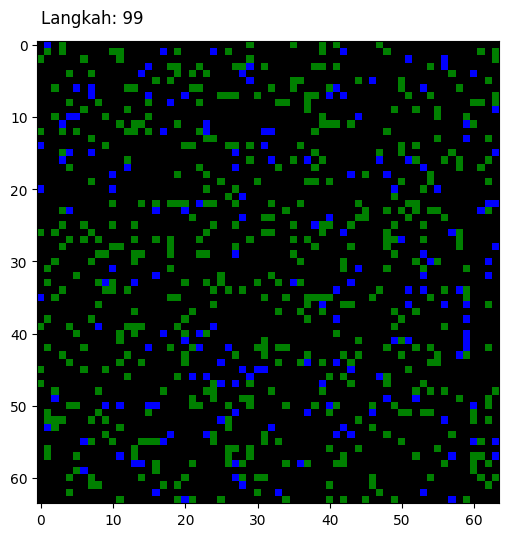

In [1]:
# Kelompok 1 (Khulika Malkan)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.colors import ListedColormap
from IPython.display import HTML

# Kelas Simulasi Kebakaran Hutan
class SimulasiKebakaran:
    def __init__(self, tinggi, lebar):
        self.tinggi = tinggi
        self.lebar = lebar
        self.lahan = np.zeros((tinggi, lebar), dtype=int)  # 0: rumput, 1: pohon, 2: api
        self.angin = 'sedang'  # Tambahkan pengaruh angin
        self.kemungkinan_api = 0.07  # Lebih mudah terbakar
        self.kemungkinan_tumbuh = 0.03  # Lebih mudah tumbuh
        self.suhu_harian = self.buat_suhu()
        self.init_lahan()

    # Inisialisasi lahan dengan pohon dan api
    def init_lahan(self):
        self.lahan = np.random.choice([0, 1], size=(self.tinggi, self.lebar), p=[0.4, 0.6])
        i, j = np.random.randint(0, self.tinggi), np.random.randint(0, self.lebar)
        self.lahan[i, j] = 2  # Api di lokasi acak

    # Membuat suhu harian (24 jam)
    def buat_suhu(self):
        return np.random.uniform(20, 40, 24)  # Suhu bervariasi lebih lebar

    # Cek apakah ada tetangga yang terbakar
    def cek_tetangga_api(self, i, j):
        tetangga = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Atas, bawah, kiri, kanan
        # Pengaruh angin membuat api menyebar lebih jauh secara horizontal
        if self.angin == 'sedang':
            tetangga.extend([(0, -2), (0, 2)])  # Api menyebar lebih jauh secara horizontal
        elif self.angin == 'kencang':
            tetangga.extend([(0, -3), (0, 3), (-1, -1), (-1, 1), (1, -1), (1, 1)])

        for di, dj in tetangga:
            ni, nj = i + di, j + dj
            if 0 <= ni < self.tinggi and 0 <= nj < self.lebar and self.lahan[ni, nj] == 2:
                return True
        return False

    # Simulasi langkah
    def langkah(self, langkah_ke):
        if langkah_ke % 24 == 0 and langkah_ke > 0:  # Update suhu setiap 24 jam
            self.suhu_harian = self.buat_suhu()

        lahan_baru = self.lahan.copy()
        for i in range(self.tinggi):
            for j in range(self.lebar):
                # Jika api, jadi rumput
                if self.lahan[i, j] == 2:
                    lahan_baru[i, j] = 0
                # Jika rumput, ada kemungkinan tumbuh pohon
                elif self.lahan[i, j] == 0 and self.kemungkinan_tumbuh > np.random.rand():
                    lahan_baru[i, j] = 1
                # Jika pohon, ada kemungkinan terbakar
                elif self.lahan[i, j] == 1:
                    faktor = 3 if self.suhu_harian[langkah_ke % 24] > 30 else 1
                    if self.kemungkinan_api * faktor > np.random.rand() or self.cek_tetangga_api(i, j):
                        lahan_baru[i, j] = 2
        self.lahan = lahan_baru

# Fungsi untuk update animasi
def update(frame):
    im.set_data(sim.lahan)
    teks.set_text(f"Langkah: {frame}")
    sim.langkah(frame)
    return [im, teks]

# Inisialisasi simulasi
sim = SimulasiKebakaran(tinggi=64, lebar=64)

# Membuat colormap khusus
cmap = ListedColormap(["black", "green", "blue"])  # 0: black, 1: green, 2: blue

# Plot untuk animasi
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(sim.lahan, cmap=cmap, animated=True, vmin=0, vmax=2)
teks = ax.text(0, -3, "", fontsize=12)

# Animasi
animasi = animation.FuncAnimation(fig, update, frames=100, interval=200, blit=True)
HTML(animasi.to_jshtml())